In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Projeto de Visão Computacional

 Aplicação de técnicas de classificação de imagens e Reconhecimento Óptico de Caracteres (OCR) usando o conjunto de dados MNIST.

In [2]:
# Carregar o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

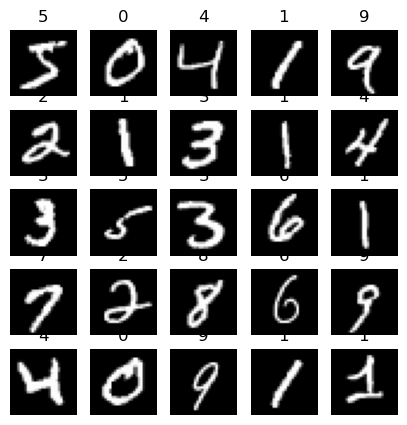

In [3]:
# Visualizar algumas amostras de imagens
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

## Verificar a forma dos tensores de imagem e rótulo

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

## Plotar um histograma dos rótulos

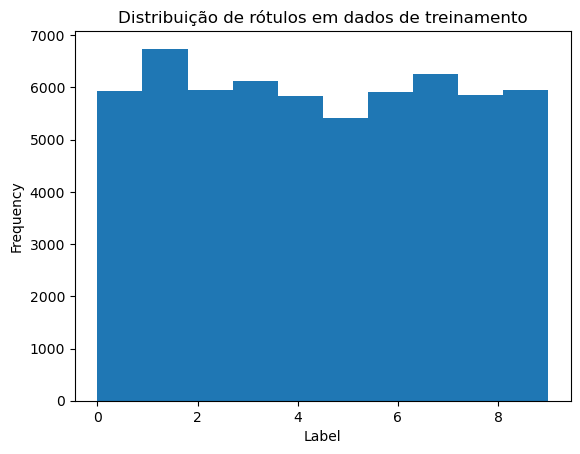

In [6]:
plt.hist(train_labels, bins=10)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribuição de rótulos em dados de treinamento')
plt.show()

## Criação e treinamento do modelo de rede neural artificial:

Definir a arquitetura do modelo

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7903 - loss: 8.3607 - val_accuracy: 0.8942 - val_loss: 0.4901
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9005 - loss: 0.4198 - val_accuracy: 0.9179 - val_loss: 0.3496
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9193 - loss: 0.3101 - val_accuracy: 0.9216 - val_loss: 0.3539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9286 - loss: 0.2689 - val_accuracy: 0.9365 - val_loss: 0.2691
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9377 - loss: 0.2377 - val_accuracy: 0.9106 - val_loss: 0.3642
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9402 - loss: 0.2315 - val_accuracy: 0.9391 - val_loss: 0.2628
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9461 - loss: 0.2053 - val_accuracy: 0.9462 - val_loss: 0.2572
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9477 - loss: 0.2035 - 

In [10]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9347 - loss: 0.3359


0.9426000118255615

## Trocar a rede neural simples por uma rede neural convolucional

In [11]:
# Definir a arquitetura da rede neural convolucional (CNN)
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# Compilar o modelo CNN
model_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [13]:
# Adicionar uma dimensão de canal para os dados de imagem
train_images_cnn = train_images[..., tf.newaxis]
test_images_cnn = test_images[..., tf.newaxis]

In [14]:
# Treinar o modelo CNN
history_cnn = model_cnn.fit(train_images_cnn, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8222 - loss: 1.5965 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9795 - loss: 0.0725 - val_accuracy: 0.9787 - val_loss: 0.0797
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9847 - loss: 0.0491 - val_accuracy: 0.9799 - val_loss: 0.0729
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9864 - loss: 0.0419 - val_accuracy: 0.9836 - val_loss: 0.0653
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9839 - val_loss: 0.0674
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9913 - loss: 0.0282 - val_accuracy: 0.9840 - val_loss: 0.0645
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9847 - val_loss: 0.0659
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9933 -

In [15]:
# Avaliar o modelo CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels)
test_acc_cnn

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9815 - loss: 0.0917


0.9839000105857849

## Criar uma matriz de confusão

In [16]:
# Fazer previsões sobre os dados de teste
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [17]:
# Criar a matriz de confusão
conf_matrix = confusion_matrix(test_labels, predicted_labels)

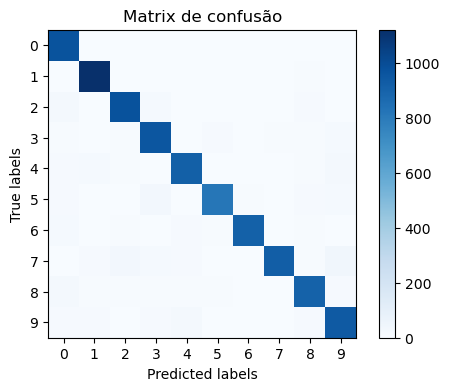

In [18]:
# Visualizar a matriz de confusão
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
plt.title('Matrix de confusão')
plt.show()